<a href="https://colab.research.google.com/github/asmitaavni/github-upload/blob/main/Simple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE SPARK FOUNDATION - DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

GRIP - April 2022

Task 1 - Prediction using Supervised ML by Asmita Kubal


---



In [ ]:
# importing all necessary libraries to perform the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



```
Importing Dataset
```



In [ ]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [ ]:
#showing first few rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# To get the number of rows and column data
print("There are",data.shape[0], "rows in the dataset")
print("There are",data.shape[1], "columns in the dataset")

There are 25 rows in the dataset
There are 2 columns in the dataset


In [ ]:
# To get the information about each column and data type of each feature/column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# To get basic statistics of numerical/continous data column
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# To check, does data have any null
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#Splitting data into Dependent and Independent Variables
X=data.iloc[:,0:1]    # hours is independent variable
y=data.iloc[:,1:]    # Score is dependent variable

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


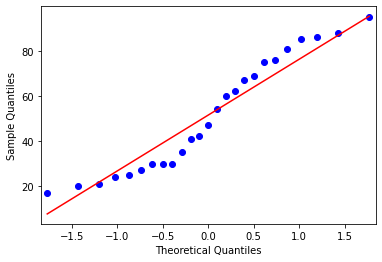

In [ ]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(data['Scores'], line='s')
plt.show()

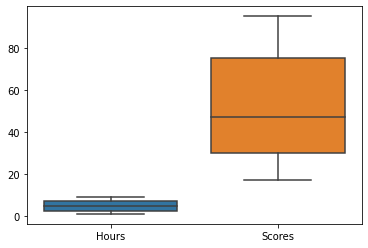

In [ ]:
# to plot boxplot of numerical columns to check whether any outliers are present or not.
sns.boxplot(data=data)

In [ ]:
corr=np.corrcoef(data['Hours'],data['Scores'])
corr

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

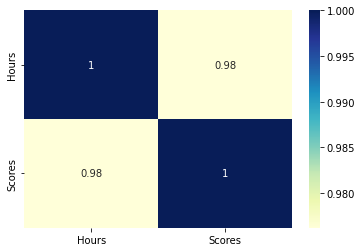

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

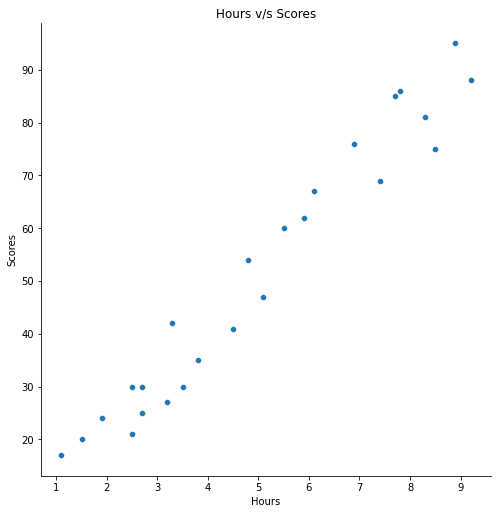

In [ ]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours v/s Scores')
plt.show()

In [ ]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=0)

Problem statement: Preditct the percentage of an student based on the no. of study hours.

**Build Simple Linear Regression**

Equation of simple linear regression is given as 
y=a+b*x
where 
y: dependent variable : Scores
x: indepedent variable : Study Hours
a: intercept coefficient
b: slope coefficient


In [ ]:
# import the class
from sklearn.linear_model import LinearRegression
# instantiate the model
lr=LinearRegression()
# fit the model with data
lr.fit(X_train, y_train)

LinearRegression()

Visualization of model

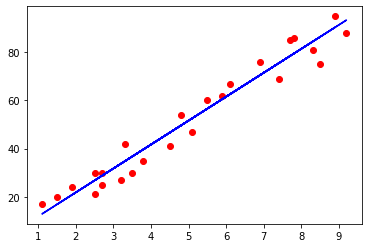

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,lr.predict(X),color='blue')
plt.show()

Regression Coefficients

In [ ]:
a=float(lr.intercept_)
b=float(lr.coef_)
print('The intercept coefficient of the model is',a)
print('The slope coefficient of the model is',b)

The intercept coefficient of the model is 1.9322042531516601
The slope coefficient of the model is 9.941678339488094


Estimated Regression Model

In [ ]:
print('The estimated regression model is given as Score=',a,'+',b,'* Hours')

The estimated regression model is given as Score= 1.9322042531516601 + 9.941678339488094 * Hours


In [ ]:
y_pred=lr.predict(X_test)
y_pred
ypred=lr.predict(X)
ypred
res=y-ypred

Model Performance of test data set

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
print ("Coefficient of determination :",r2_score(y_test,y_pred))
print ("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Coefficient of determination : 0.9367661043365056
MSE:  20.33292367497996
RMSE:  4.509204328368805


Model Performance for Entire data

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
print("Coefficient of determination :",r2_score(y,lr.predict(X)))
print("MSE: ",mean_squared_error(y,lr.predict(X)))
print("RMSE: ",np.sqrt(mean_squared_error(y,lr.predict(X))))

Coefficient of determination : 0.9525462098246908
MSE:  29.129490117597488
RMSE:  5.3971742715607665


In [ ]:
study_hours=float(input("enter studied hours: "))
print("The score of the student who studied for", study_hours,"is",a+b*study_hours)